# <center>Homework 3

##  <center>Question 1 <br><br> 

Use the code below or your own code to provide a demonstration of Bayesian inference for this data and model specification.

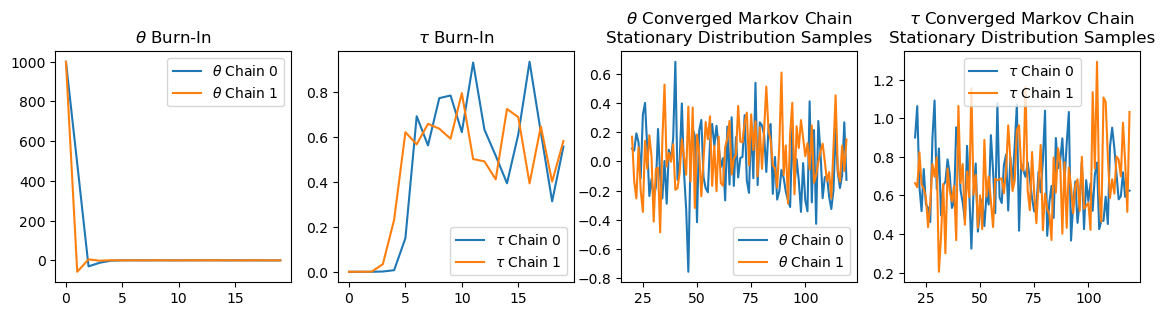

In [6]:
import numpy as np
from scipy.stats import norm, gamma
import matplotlib.pyplot as plt


n = 30
x = norm(loc=0, scale=1).rvs(size=n)
C, G = 2, 10000  # chains, Gibbs samples
theta, tau = np.zeros([C, G]), np.zeros([C, G])
theta[:, 0] = 1000  # initialization

# Gibbs sampler
for c in range(C):
    for g in range(1, G):
        # Sample tau from Gamma distribution
        alpha_n = n / 2
        beta_n = 0.5 * np.sum((x - theta[c, g-1])**2)
        tau[c, g] = gamma.rvs(a=alpha_n, scale=1 / beta_n)

        # Sample theta from Normal distribution
        mu_n = np.mean(x)
        sigma_n = 1 / np.sqrt(n * tau[c, g])
        theta[c, g] = norm.rvs(loc=mu_n, scale=sigma_n)

fig,ax = plt.subplots(1, 4, figsize=(14,3)); ax[0].set_title("$\\theta$ Burn-In"); ax[1].set_title("$\\tau$ Burn-In"); ax[2].set_title("$\\theta$ Converged Markov Chain\nStationary Distribution Samples"); ax[3].set_title("$\\tau$ Converged Markov Chain\nStationary Distribution Samples")
burn = 20
demo = 120
for c in range(C):
    ax[0].plot(theta[c,:burn], label="$\\theta$ Chain "+str(c))
    ax[1].plot(tau[c,:burn], label="$\\tau$ Chain "+str(c))
    ax[2].plot(np.arange(burn, demo, dtype=int), theta[c,burn:demo], label="$\\theta$ Chain "+str(c))
    ax[3].plot(np.arange(burn, demo, dtype=int), tau[c,burn:demo], label="$\\tau$ Chain "+str(c))
ax[0].legend(); ax[1].legend(); ax[2].legend(); ax[3].legend(); 


##  <center>Question 2 <br><br> 

 Explain how to equate $\alpha $ and $\lambda $
 with controlling the amount and nature of information the prior contributes to the posterior. How can we interpret these as controlling a "number of data points" contributed by the prior relative to the number of data points contributed to the posterior through the likelihoood?Demonstrate how changing the prior hyperparameters influences the posterior relative to the sample and the likelihood.


$Answer$ <br>
α acts as a shape parameter that controls the concentration of the prior belief while λ acts as the rate parameter influencing the prior spread. α and λ control how much the prior influences the posterior distribution relative to the data. In terms of data points, we can assume α and λ are parameters that control the " number of data points " the prior gives to the posterior. So as α and λ get larger the number of data points the prior gives allows it to have more influence on the posterior when compared to likelihood. Likewise, as α and λ decrease the less influence the prior has on the posterior when compared to likelihood.

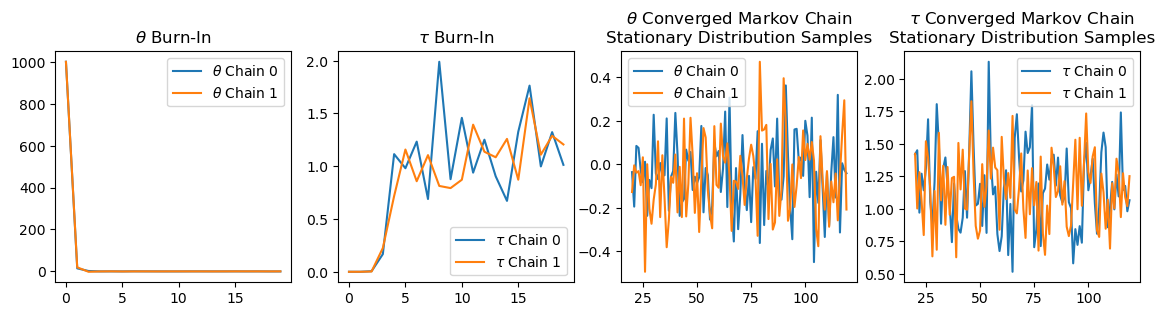

In [14]:
import numpy as np
from scipy.stats import norm, gamma
import matplotlib.pyplot as plt

# From deriving full con 
alpha = 2  # Shape parameter 
lambda_prior = 2  # Rate parameter controls spread 

# From Q1
n = 30  # Number of observations
x = norm(loc=0, scale=1).rvs(size=n)  


C, G = 2, 10000  # chains, Gibbs samples
theta, tau = np.zeros([C, G]), np.zeros([C, G])  # Storage for samples
theta[:, 0] = 1000  

# Gibbs sampler
for c in range(C):
    for g in range(1, G):
        # Updated tau -> 
        # Posterior shape = prior alpha + likelihood 
        alpha_n = alpha + n / 2  
        # beta_n: Posterior rate parameter = prior lambda + sum of squared residuals
        beta_n = lambda_prior + 0.5 * np.sum((x - theta[c, g-1])**2)
        tau[c, g] = gamma.rvs(a=alpha_n, scale=1 / beta_n)

        # Update theta (mean) from its Normal full conditional
        # mu_n: Posterior mean = mean of the data
        mu_n = np.mean(x)
        # sigma_n: Posterior standard deviation depends on the precision (tau) and number of observations (n)
        sigma_n = 1 / np.sqrt(n * tau[c, g])
        theta[c, g] = norm.rvs(loc=mu_n, scale=sigma_n)

# Plotting results
fig, ax = plt.subplots(1, 4, figsize=(14, 3))
ax[0].set_title("$\\theta$ Burn-In")
ax[1].set_title("$\\tau$ Burn-In")
ax[2].set_title("$\\theta$ Converged Markov Chain\nStationary Distribution Samples")
ax[3].set_title("$\\tau$ Converged Markov Chain\nStationary Distribution Samples")

burn = 20  
demo = 120  
for c in range(C):
    ax[0].plot(theta[c, :burn], label="$\\theta$ Chain " + str(c))
    ax[1].plot(tau[c, :burn], label="$\\tau$ Chain " + str(c))
    ax[2].plot(np.arange(burn, demo, dtype=int), theta[c, burn:demo], label="$\\theta$ Chain " + str(c))
    ax[3].plot(np.arange(burn, demo, dtype=int), tau[c, burn:demo], label="$\\tau$ Chain " + str(c))
ax[0].legend()
ax[1].legend()
ax[2].legend()
ax[3].legend()
plt.show()



##  <center>Question 3 <br><br> 

Read the following "conversation". My reactions to this initial text I was provied with are the colored font. Then either (A) provide an analagous derivation of this result for the multinomial-Dirichlet specification, or (B) just report that if the prior is a proper distribution then the posterior is proportional to the joint distribution as Bayes Theorem tells us and describe how one might therefore identify the exact distribution of the posterior by just looking at the joint but that finally all this is moot and beside the point because as Bayesians we're going to trade any functional forms of distributions for samples from those distributions to just make histograms and belief (credible interval probability) statements based on those anyway..

$(B)$

I believe that if the prior is a proper distribution, the denominator is just a normalizing constant. Therefore according to Bayes Theorem, the posterior is proportional to the joint distribution.So when looking at the joint distribution it is possible to identify the posterior. But Bayesians don't think the distribution as very important because we are just going to trade it all for samples from those distributions to make histograms and beliefs ( credible interval probability).